[[1.66687181e-01 3.92111988e-02 3.30793260e-02 3.65819679e-02]
 [1.57050623e-02 1.76611974e-02 8.19503843e-03 2.85361124e-01]
 [5.34495436e-03 1.89620052e-02 1.82740325e-02 2.35304461e-01]
 [5.55147842e-03 1.05949418e-02 2.83776372e-03 1.08449225e-01]
 [2.35338642e-01 1.66773756e-02 9.29069120e-03 1.25738209e-02]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [9.86500989e-06 1.80016239e-05 1.70535081e-02 1.81419758e-05]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [8.82483209e-03 1.23886214e-02 2.39740360e-02 1.97239364e-01]
 [9.55890710e-03 3.17925035e-01 1.96493982e-02 2.19506080e-02]
 [9.38364395e-02 1.52626865e-03 1.18141579e-03 1.37977502e-03]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [1.12221035e-01 2.48766554e-02 4.99656076e-01 3.94512844e-02]
 [1.53409146e-01 9.11791002e-01 1.71291758e-01 1.83806601e-01]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.000000

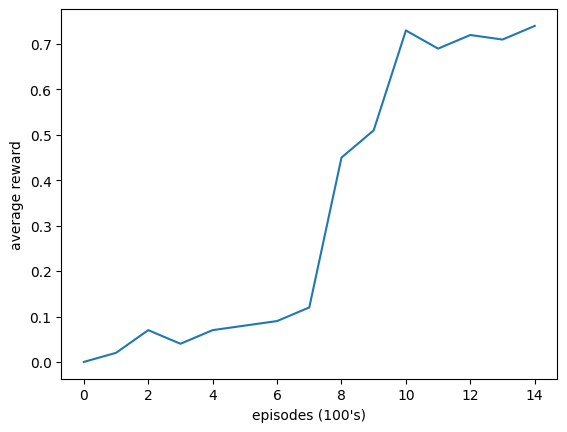

In [6]:
import gym
import numpy as np
import time

env = gym.make('FrozenLake-v1')
STATES = env.observation_space.n
ACTIONS = env.action_space.n

Q = np.zeros((STATES, ACTIONS))

EPISODES = 1500 # how many times to run the enviornment from the beginning
MAX_STEPS = 100  # max number of steps allowed for each run of enviornment

LEARNING_RATE = 0.81  # learning rate
GAMMA = 0.96

RENDER = False # if you want to see training set to true

epsilon = 0.9



rewards = []
for episode in range(EPISODES):

  state = env.reset()
  for _ in range(MAX_STEPS):

    if RENDER:
      env.render()

    if np.random.uniform(0, 1) < epsilon:
      action = env.action_space.sample()
    else:
      action = np.argmax(Q[state, :])

    next_state, reward, done, _ = env.step(action)

    Q[state, action] = Q[state, action] + LEARNING_RATE * (reward + GAMMA * np.max(Q[next_state, :]) - Q[state, action])

    state = next_state

    if done:
      rewards.append(reward)
      epsilon -= 0.001
      break  # reached goal

print(Q)
print(f"Average reward: {sum(rewards)/len(rewards)}:")
# and now we can see our Q values!


# we can plot the training progress and see how the agent improved
import matplotlib.pyplot as plt

def get_average(values):
  return sum(values)/len(values)

avg_rewards = []
for i in range(0, len(rewards), 100):
  avg_rewards.append(get_average(rewards[i:i+100]))

plt.plot(avg_rewards)
plt.ylabel('average reward')
plt.xlabel('episodes (100\'s)')
plt.show()